In [1]:
import numpy as np
import matplotlib.pyplot as plt

### We will generate 100 samples of uniform distribution by linear congruential generator

### Start parameters are gained: $z_1 = 2456, a = 113, b = 2, m = 10000$

In [2]:
length, z_1, m = 100, 2456, 10000
a, b = 113, 2

In [3]:
def data_gen(length, z_1, m, a, b):
    z = [z_1] * length
    for i in range(1, len(z)):
        z[i] = (a * z[i-1] + b) % m
    
    return [z_el / m for z_el in z]

In [4]:
x = data_gen(length=length, z_1=z_1, m=m, a=a, b=b)
x[:10]

[0.2456, 0.753, 0.0892, 0.0798, 0.0176, 0.989, 0.7572, 0.5638, 0.7096, 0.185]

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


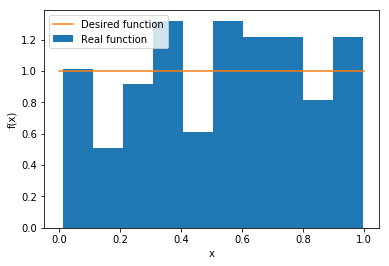

In [5]:
plt.hist(x, bins=10, normed=True)
plt.plot(np.linspace(0, 1, 100), [1]*100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Desired function', 'Real function']);

### Let's draw a plot of the desired $R(0, 1)$ distribution function and the real data distribution function
### $F_{uniform}(x) = x$

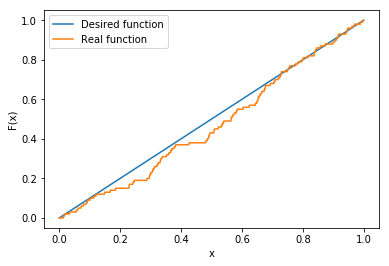

In [6]:
x_check = np.linspace(0, 1, 1000)
y_unif = x_check
y_data = np.array([np.sum([x < point]) for point in x_check]) / len(x)

plt.plot(x_check, y_unif)
plt.plot(x_check, y_data)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(['Desired function', 'Real function']);

### Now let's check our distribution by Kolmogorov–Smirnov test with $\alpha = 0.05$ 
#### $KS = D \sqrt n, D = sup_{x}|F(x) - F_0(x)|$
#### $KS_\alpha = \sqrt{-\frac{1}{2}ln(\frac{\alpha}{2})}, H_0 - true$

In [7]:
def kolm_smirn(y_real, y_wanted, n, alpha=0.05):
    D = np.max(np.abs(y_real - y_wanted))
    KS = D * np.sqrt(n)
    KS_a = np.sqrt(-0.5 * np.log(alpha / 2))
    return KS, KS_a

In [8]:
KS, KS_a = kolm_smirn(y_unif, y_data, len(x))
print(f'KS = {KS}, KS_a = {KS_a}')

KS = 1.0048048048048046, KS_a = 1.3581015157406195


### $KS < KS_\alpha$, so there is no reason to reject $H_0$
### And finally let's check previous steps with 10 000 length data

In [9]:
x_check = np.linspace(0, 1, 20000)
x = data_gen(length=10000, z_1=z_1, m=m, a=a, b=b)
y_unif = x_check
y_data = np.array([np.sum([x < point]) for point in x_check]) / len(x)

KS, KS_a = kolm_smirn(y_unif, y_data, len(x))
print(f'KS = {KS}, KS_a = {KS_a}')

KS = 0.13999199959998002, KS_a = 1.3581015157406195


### Here also $KS < KS_\alpha$, so there is no reason to reject $H_0$